# Coordinate Descent for Linear Regression: User Guide

## Introduction to Coordinate Descent and Linear Regression

Linear regression is a fundamental statistical and machine learning method where the goal is to model the relationship between a scalar response (or dependent variable) y and one or more explanatory variables (or independent variables) x. 

The linear regression model is given by:

\[ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_p x_p + \epsilon \]

In this equation: 

-  \(y\) is the response variable
-  \(\beta_0\) is the intercept
- \(\beta_1, \beta_2, \ldots, \beta_p\) are the coefficients
-  \(x_1, x_2, \ldots, x_p\) are the predictor variables
-  \(\epsilon\) is the error term.

The performance of a linear regression model is typically assessed using the mean squared error (MSE), which is defined as:

\[ \text{MSE}(\beta) = \frac{1}{n} \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \ldots + \beta_p x_{ip}))^2 \]

The gradient of the MSE with respect to a single coefficient \(\beta_j\) is given by:

\[ \frac{\partial \text{MSE}(\beta)}{\partial \beta_j} = -\frac{2}{n} \sum_{i=1}^{n} x_{ij} (y_i - \hat{y}_i) \]
for \(j=1,\dots,p\),
\[ \frac{\partial \text{MSE}(\beta)}{\partial \beta_j} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) \]
for \(j=0\),
where \(\hat{y}_i\) is the predicted value for the \(i\)-th observation.

Coordinate Descent is an optimization algorithm that updates one coefficient at a time, holding all others constant, and iterating this process until convergence.

This document guides you through utilizing the coordinate_descent function within the `lr_cd` package to perform linear regression using the Coordinate Descent algorithm.

## Set up

Before starting, ensure you have installed the lr_cd package and import the necessary libraries:

In [20]:
import lr_cd
import matplotlib.pyplot as plt
import numpy as np

## Generating synthetic data

The `generate_data_lr` function offers a convenient method for generating random data points. Initially, it creates an array of random numbers within the half-open interval [0.0, 1.0) to serve as the x-coordinates. Then, the y-coordinates are calculated using the true coefficients, which the user specifies. A random `noise` factor is generated from a normal distribution with a mean of zero and a variance specified by the user, which is then added to the y-coordinates.

Users have control over the number of data points, the number of features (regressors), and the true coefficients by providing values for `n`, `n_features`, and `theta` in the function. An array with at least 2 elements is expected for `theta`, with the first element always being the true intercept.

Optional inputs include `noise` and `random_seed`. Specifying a value larger than the default `0.2` increases the variation and dispersion of the data away from the true regression line. It is recommended for users to include a `random_seed` for reproducibility.


In [21]:
from lr_cd.lr_data_generation import generate_data_lr

# example 1
theta = np.array([4, 3])
X, y = generate_data_lr(n=10, n_features=1, theta=theta)

## Coordinate Descent Algorithm

The `coordinate_descent` function, imported from the `lr_cd` module, implements the coordinate descent algorithm for linear regression. 

### Working with synthetic data
In the first example, we apply this function to the synthetic data set from example 1. This function determines the best-fit intercept and coefficients. In this example, we used the underscore (`_`) to disregard any additional outputs that we don't wish to store. 

In [22]:
from lr_cd.lr_cd import coordinate_descent

# Use the synthetic data generated from example 1
intercept_1, coef_1, _ = coordinate_descent(X, y)
print(f"lr_cd Intercept for example 1: {intercept_1}")
print(f"lr_cd Coefficients for example 1: {coef_1}")


lr_cd Intercept for example 1: 4.0240072117306145
lr_cd Coefficients for example 1: [[3.10261496]]


### Working with Real-world Data

#### Diabetes Dataset Overview
The diabetes dataset contains ten baseline variables—age, sex, body mass index (BMI), average blood pressure, and six blood serum measurements—taken from 442 patients. The target variable for prediction is a quantitative measure of disease progression one year after baseline.

For more details, visit the [Diabetes Data](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html) page.

Below we use the diabetes dataset for a more realistic example:

In [23]:
from sklearn import datasets, linear_model
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Isolate one feature for simplicity 
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Apply the Coordinate Descent algorithm
intercept_diabetes, coef_diabetes, _ = coordinate_descent(diabetes_X_train, diabetes_y_train)
print(f"lr_cd Intercept for diabetes dataset: {intercept_diabetes}")
print(f"lr_cd Coefficients for diabetes dataset: {coef_diabetes}")


lr_cd Intercept for diabetes dataset: 152.9188618261616
lr_cd Coefficients for diabetes dataset: [[938.23786125]]


## Validation with Scikit-learn

To ensure the reliability of the `lr_cd` package's coordinate descent algorithm, it is compared with `sklearn`'s established implementation. This comparison validates the accuracy and verifies that both yield consistent results for linear regression tasks. Benchmarking against `sklearn` not only confirms the algorithm's correctness but also helps pinpoint any discrepancies or bugs.

In [24]:
# compare sklearn result for example 1
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

intercept_s_1, coef_s_1= lin_reg.intercept_, lin_reg.coef_
print(f"Sklearn Intercept for example 1: {intercept_s_1}")
print(f"Sklearn Coefficients for example 1: {coef_s_1}")

Sklearn Intercept for example 1: [4.02400155]
Sklearn Coefficients for example 1: [[3.10262393]]


In [25]:
# compare sklearn result for example 2
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# results
intercept_s_diabetes, coef_s_diabetes= regr.intercept_, regr.coef_
print(f"Sklearn Intercept for diabetes dataset: {intercept_s_diabetes}")
print(f"Sklearn Coefficients for diabetes dataset: {coef_s_diabetes}")

Sklearn Intercept for diabetes dataset: 152.91886182616113
Sklearn Coefficients for diabetes dataset: [938.23786125]


## Visualization

The `plot_lr` function provides a graphical representation of linear regression, overlaying the regression line—calculated using the estimated coefficients and intercept—onto the scatter plot of the data points.

This function requires four parameters: the X and y data, which can be generated internally by the package's data generation function or sourced externally, as well as the intercept and coefficient values derived from the `lr_cd` algorithm. The resulting plot offers visual confirmation of how well the linear regression model fits the data.

In the example provided, the dataset used for plotting is sourced from the package's own `data_generation` function (example 1).

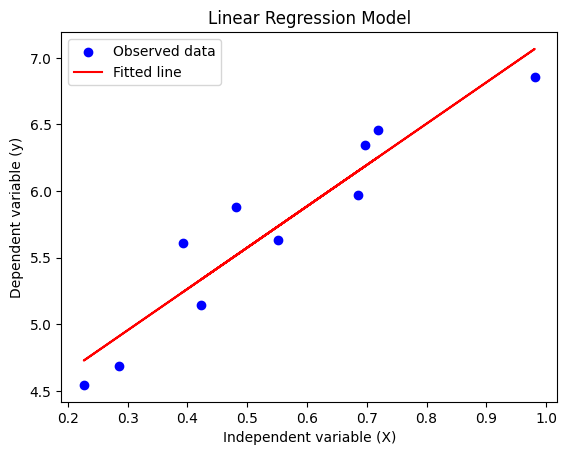

In [26]:
# example 1 from data generation function
from lr_cd.lr_plotting import plot_lr
plot_1 = plot_lr(X, y, intercept_1, coef_1)

The `plot_lr` function is flexible, allowing for the visualization of linear regression models regardless of the algorithm used to estimate the intercept and coefficients. The key requirement is that these values are provided in the correct data type.

In the demonstration below, we employ the `plot_lr` function to display a linear regression model whose parameters were computed using the `sklearn` algorithm from example 1. 

To confrom with the input specifications of `plot_lr`, we convert the `sklearn`-generated intercept from a numpy array to a float. This visualization not only confirms the successful application of the `plot_lr` function with parameters from an external source but also visually underscores that the `lr_cd` model is in alignment with the results from `sklearn`'s linear regression algorithm.

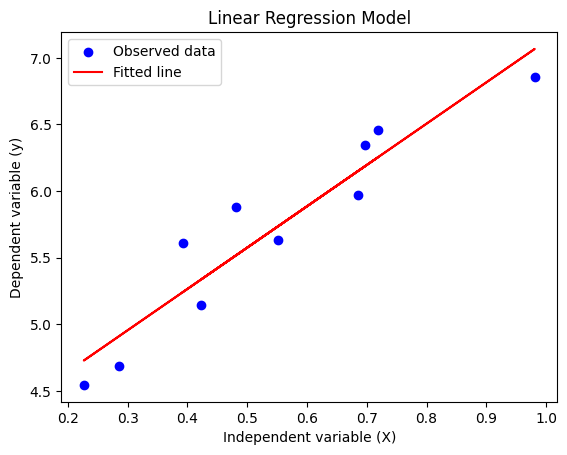

In [27]:
# example 1 from sklearn
plot_1_sk = plot_lr(X, y, intercept_s_1[0], coef_s_1)

In the second example, we took the dataset taken from the real-world scenario.

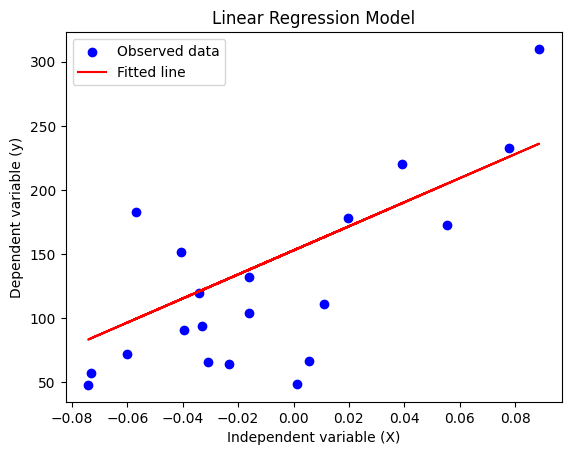

In [28]:
# diabetes dataset
plot_2 = plot_lr(diabetes_X_test, diabetes_y_test, intercept_s_diabetes,
                  coef_s_diabetes)

Using the `matplotlib` package, we can cross-validate the output of the `plot_lr` function by generating a comparable plot. By plotting the regression line and data points manually with matplotlib and comparing it to our `plot_lr` output, we can confirm the accuracy of our model's coefficients and intercept.

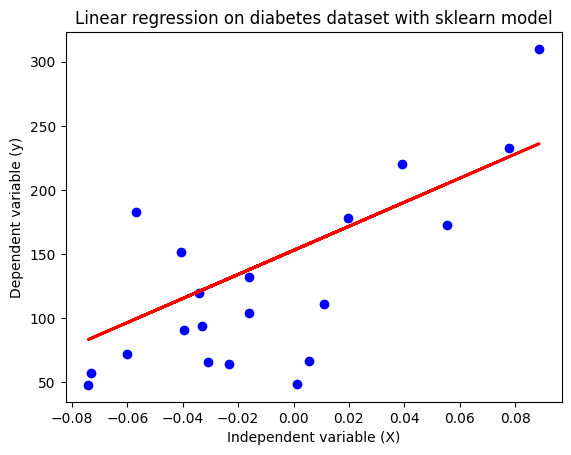

In [29]:
# Plot outputs from sklearn for diabetes dataset
plt.scatter(diabetes_X_test, diabetes_y_test, color="blue")
plt.plot(diabetes_X_test, diabetes_y_pred, color="red", linewidth=2)
plt.title('Linear regression on diabetes dataset with sklearn model')
plt.xlabel('Independent variable (X)')
plt.ylabel('Dependent variable (y)')

plt.show()

## Reference
- Efron, B., Hastie, T., Johnstone, I., & Tibshirani, R. (2004). Least angle regression. The Annals of statistics, 32(2), 407-499.
- Scikit-learn Developers. (n.d.). Linear Regression Example. Scikit-learn. https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
- NCSU. (n.d.). Diabetes Dataset. https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html